In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from checkStationary import ADF
from checkSeasonality import powerDensity

PATH = '/home/tbrownex/data/Hackett/JLP/'
FILE = '4 Banstead.csv'

In [25]:
def printSeries(series, dtList):
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(20)
    majorFormatter = FormatStrFormatter('%d')
    #minorLocator = MultipleLocator(1)
    
    fig, ax = plt.subplots()
    ax.plot_date(dtList.to_pydatetime(), s, 'v-')
    
    plt.plot(series)
    #plt.axvline(x=24,color='r', linewidth=.75)
    #plt.axvline(x=28,color='r', linewidth=.75)
    ax.set_ylim([0,series.max()])

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
    #ax.xaxis.set_minor_locator(minorLocator)
    plt.show()

In [17]:
df = pd.read_csv(PATH+FILE)

part1 = df.loc[df["Trading Week"]<"2017-06"]
part1.name = "part1"
part2 = df.loc[(df["Trading Week"]>"2017-06") & \
               (df["Trading Week"]<"2017-06-20")]
part2.name = "part2"
part3 = df.loc[df["Trading Week"]>"2017-07-17"]
part3.name = "part3"

partList = [part1, part2, part3]

print("Date ranges are:")
for x in partList:
    print("{}: {} - {}".format(x.name, x["Trading Week"].min(), x["Trading Week"].max()))

Date ranges are:
part1: 2013-01-07 - 2017-05-29
part2: 2017-06-05 - 2017-06-19
part3: 2017-07-24 - 2018-03-26


In [20]:
# Get list of all LGs and also all the Dates
lgList = sorted(part1["Layout Group"].unique())
dtList = sorted(part1["Trading Week"].unique())

In [5]:
part1 = part1.set_index(["Layout Group", "Trading Week"]).sort_index()
part2 = part2.set_index(["Layout Group", "Trading Week"]).sort_index()
part3 = part3.set_index(["Layout Group", "Trading Week"]).sort_index()

##### Test for Stationarity

In [6]:
count = 0
print("Non-Stationary LGs:")
for lg in lgList:
    series = part1.loc[lg]["Full Price Sales"]
    stationary = ADF(series, "5%", False)
    if not stationary:
        count += 1
        print(lg)
print("{}{} non-stationary LGs out of {}".format("\n",count, len(lgList)))

Non-Stationary LGs:
31
36
54
322
378
448
451
455

8 non-stationary LGs out of 59


##### Test for Seasonality

In [7]:
freq = len(series)
print("Seasonal LGs:")

count = 0
for lg in lgList:
    series = part1.loc[lg]["Full Price Sales"]
    seasonal, maxFreq = powerDensity(series, freq, lg, False)
    if seasonal:
        print(lg, maxFreq)
        count += 1
print("{}{} seasonal LGs out of {}".format("\n",count, len(lgList)))

Seasonal LGs:
13 4.0
15 4.0
33 4.0
37 9.0
46 4.0
54 1.0
76 9.0
86 5.0
95 4.0
96 5.0
218 4.0
223 4.0
280 9.0
283 9.0
307 5.0
310 13.0
342 5.0
350 9.0
378 4.0
380 4.0
427 4.0
453 4.0
489 1.0

23 seasonal LGs out of 59


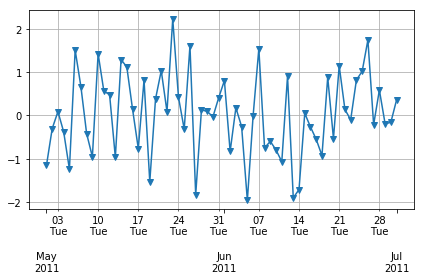

In [15]:
 import matplotlib.dates as dates

idx = pd.date_range('2011-05-01', '2011-07-01')
s = pd.Series(np.random.randn(len(idx)), index=idx)

fig, ax = plt.subplots()
ax.plot_date(idx.to_pydatetime(), s, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'to_pydatetime'

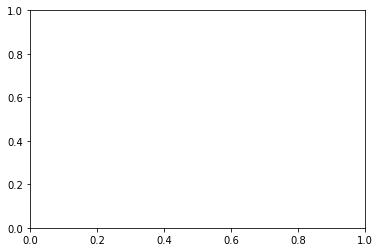

In [26]:
printSeries(part1.loc[13]["Full Price Sales"], dtList)

In [ ]:
def ghFilter(series, init, rate, g, h, dt):
    '''
    init= initial guess
    rate = gain/day
    g = measurement vs prediction factor
    h = old gain/day vs current gain/day factor
    dt = time step (1/day)'''
    estimates   = []
    predictions = []
    rates = []
    prevWeight = init
    for w in series:
        pred     = prevWeight + rate*dt
        residual = w - pred
        est      = pred + g*residual
        estimates.append(est)          # Save the estimate
        predictions.append(pred)       # Save the prediction
        rate = rate + h*(residual)/dt        # Update the model gain/day
        rates.append(rate)
        prevWeight = est
    return predictions, estimates, np.asarray(rates)

In [ ]:
init   = 1100.          # Initial guess
rate = 1.          # "dx"...the multiplier in the model
g    = .2
h    = .1
dt   = 1.            # time interval (1 day)

predictions, estimates, rates = ghFilter(series, init, rate, g, h, dt)

In [ ]:
plt.plot(ma)
plt.show()

In [ ]:
plt.plot(rates)
plt.show()

In [ ]:
plt.plot(estimates, color="r")
plt.plot(series, color="b")
#plt.plot(predictions, color="y")
plt.show()

In [ ]:
# This is a linear generator
def genData(init, rate, noiseFactor, size):
    return [init + rate*n + np.random.randn()*noiseFactor for n in range(size)]

In [ ]:
# This is an accelerator generator: rate is increasing
def genData2(init, rate, noiseFactor, size, accel):
    points = []
    for n in range(size):
        p = init + rate*n + np.random.randn()*noiseFactor
        points.append(p)
        rate += accel
    return points

In [ ]:
points = genData2(init=5, rate=2, noiseFactor=0, size=20, accel=.3)

plt.plot(points, 'bo')
plt.show()

In [ ]:
x0=5
rate=1
g=.2
h=.02
predictions, estimates, endGain = ghFilter(points, x0, rate, g, h, dt)

plt.plot(estimates, color="r")
plt.plot(points,  'bo')
plt.plot(predictions, color="y")
plt.show()

In [ ]:
# This shows that larger "g" means estimate will be closer to the measurement
# Smaller "g" favors the prediction
# Measurements include noise where the prediction - based on a model - ignores
# noise. So larger "g" includes more noise
x0=5
rate=1
g1=.2
h=.02
_, estimates1 = ghFilter(points, x0, rate, g1, h, dt)
g2=.7
_, estimates2 = ghFilter(points, x0, rate, g2, h, dt)

plt.plot(estimates1, color="r")
plt.plot(points,  'bo')
plt.plot(estimates2, color="y")
plt.show()

##### Varying H

In [ ]:
weights = np.linspace(0, 1, 50)

_, estimates1 = ghFilter(weights, init=0, rate=0., dt=1., g=.2, h=0.05)
_, estimates2 = ghFilter(weights, init=0, rate=2., dt=1., g=.2, h=0.05)
_, estimates3 = ghFilter(weights, init=0, rate=2., dt=1., g=.2, h=0.5)

In [ ]:
plt.plot(estimates1, color="y")
plt.plot(estimates2, color="r")
plt.plot(estimates3, color="b")
plt.show()

In [ ]:
data2 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.05)
data3 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.5)

##### Varying g and h

In [ ]:
weights = genData(init=5, rate=5., noiseFactor=50, size=100)

In [ ]:
plt.plot(weights)
plt.show()

In [ ]:
# Minimal g and h
_, estimates = ghFilter(weights, init=5, rate=28., dt=1., g=0.2, h=.0)

In [ ]:
plt.plot(estimates, color="r")
plt.plot(weights, color='b')
plt.show()

In [ ]:
from filterpy.gh import GHFilter

In [ ]:
f = GHFilter(x=0., dx=0., dt=1., g=.8, h=.2)

In [ ]:
f.__dict__